In [1]:
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmap

sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

import numpy as np

In [2]:
def question_barplot(q_id, title, idx, data, ax=None, palette="colorblind"):
    """
    Make a bar plot of a question.
    
    Parameters
    ----------
    q_id : iterable
        A list of question IDs
        Must be of `len(q_id) = 1`.
        
    title : str
        A string for the title of the plot
    
    idx : iterable
        A list with all possible question responses. Needed because sometimes not 
        all responses were used by participants of the survey
    
    ahw_data, ghw_data, nhw_data: pd.DataFrame objects
        The data frames with the survey data from AHW, GHW and NHW, respectively
    
    ax : matplotlib.Axes object, optional
        Can be used to pass an existing matplotlib.Axes object. If None, a new 
        figure object will be instantiated for the plot
    
    """
    responses = data[q_id[0]].value_counts()
    responses /= responses.sum()
    type = ["Hack Week" for i in range(len(responses))]
    responses = pd.DataFrame(dict(zip(["data", "Counts"], [type, responses])))
    responses = responses.reindex(idx)

    responses["Counts"] = responses["Counts"].replace(to_replace=np.nan, value=0.0)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6,4))

    sns.barplot(x=responses.index, y="Counts", data=responses, ax=ax, 
                hue="data", palette=palette)
    xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
    xaxislabels = ["\n".join([" ".join(x.split(" ")[:-1]), x.split(" ")[-1]]) if (len(x.split(" "))>1) else x for x in xaxislabels ]
    ax.set_xticklabels(xaxislabels, rotation=90)
    ax.set_ylabel("Fraction of Responses")
    ax.set_title(title)

    return ax

In [3]:
def question_barplot_2(q_id, title, idx, data, ax=None, palette="colorblind"):
    """
    Make a bar plot of a question comparing learning outcomes before and after.
    
    Parameters
    ----------
    q_id : iterable
        A list of question IDs for the two questions to be compared. 
        Must be of `len(q_id) = 2`, but the IDs can be the same.
        
    title : str
        A string for the title of the plot
    
    idx : iterable
        A list with all possible question responses. Needed because sometimes not 
        all responses were used by participants of the survey
    
    ahw_data, ghw_data, nhw_data: pd.DataFrame objects
        The data frames with the survey data from AHW, GHW and NHW, respectively
    
    ax : matplotlib.Axes object, optional
        Can be used to pass an existing matplotlib.Axes object. If None, a new 
        figure object will be instantiated for the plot
    
    """
    responses_before = data[q_id[0]].value_counts()
    responses_before /= responses_before.sum()
    before_type = ["Before" for i in range(len(responses_before))]
    responses_before = pd.DataFrame(dict(zip(["data", "Counts"], [before_type, responses_before])))
    responses_before = responses_before.reindex(idx)

    responses_after = data[q_id[1]].value_counts()
    responses_after /= responses_after.sum()
    after_type = ["After" for i in range(len(responses_after))]
    responses_after = pd.DataFrame(dict(zip(["data", "Counts"], [after_type, responses_after])))
    responses_after = responses_after.reindex(idx)

    responses_all = pd.concat([responses_before, responses_after])
    responses_all["Counts"] = responses_all["Counts"].replace(to_replace=np.nan, value=0.0)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6,4))

    sns.barplot(x=responses_all.index, y="Counts", data=responses_all, ax=ax, 
                hue="data", palette=palette)
    xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
    xaxislabels = ["\n".join([" ".join(x.split(" ")[:-1]), x.split(" ")[-1]]) if (len(x.split(" "))>1) else x for x in xaxislabels ]
    ax.set_xticklabels(xaxislabels, rotation=90)
    ax.set_ylabel("Fraction of Responses", fontsize = 16)
    ax.set_title(title, fontsize = 16)

    return ax

In [4]:
def reduce_data(filename):
    try:
        data = pd.read_csv(filename)
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding="ISO-8859-1")
    cols = [c for c in data.columns if c.startswith('Q')]
    data = data[cols]
    data.columns = [c.replace('ID', '') for c in data.columns]
    questions = data.iloc[0]
    data = data.iloc[1:]
    if "ImportId" in data.iloc[0, 0]:
        data = data.iloc[1:]
    return data, questions

### read in the data

In [5]:
df, questions = reduce_data('ICESat-2 hackweek 2020.csv')

In [6]:
# run this once to create a more readable table for looking up questions associated with each question number

with open('questions.md', 'w') as f:
    print(questions.to_markdown(), file=f)

### Collect all questions on learning outcomes from tutorials

In [7]:
lookup_table = {"None" : 0,
                "Little": 1,
                "Moderate" : 2,
                "Quite a bit" : 3,
                "Complete" : 4
                }

In [8]:
tutorials = df.iloc[:,df.columns.get_loc('Q9_1'):df.columns.get_loc('Q11_1')]
# replace text with numeric scale so we can do math
tutorials = tutorials.replace(lookup_table)

#### convert to numeric data so we can do math

#### >1 means more people reported their learning moving 'upward' than downward

In [9]:
print(questions["Q9_1"].split('?')[1])
s = (tutorials["Q10_1"] - tutorials["Q9_1"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_2"].split('?')[1])
s = (tutorials["Q10_2"] - tutorials["Q9_2"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_3"].split('?')[1])
s = (tutorials["Q10_3"] - tutorials["Q9_3"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_4"].split('?')[1])
s = (tutorials["Q10_4"] - tutorials["Q9_4"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_5"].split('?')[1])
s = (tutorials["Q10_5"] - tutorials["Q9_5"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_6"].split('?')[1])
s = (tutorials["Q10_6"] - tutorials["Q9_6"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_7"].split('?')[1])
s = (tutorials["Q10_7"] - tutorials["Q9_7"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_8"].split('?')[1])
s = (tutorials["Q10_8"] - tutorials["Q9_8"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_9"].split('?')[1])
s = (tutorials["Q10_9"] - tutorials["Q9_9"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_10"].split('?')[1])
s = (tutorials["Q10_10"] - tutorials["Q9_10"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_11"].split('?')[1])
s = (tutorials["Q10_11"] - tutorials["Q9_11"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))
print(questions["Q9_12"].split('?')[1])
s = (tutorials["Q10_12"] - tutorials["Q9_12"]).value_counts()
print("{:2.0f}".format((s.sum() - s.loc[0])/s.sum() * 100))

 - Introduction to the ICESat-2 Mission
90
 - Introduction to ICESat-2 data products
83
 - Git and GitHub
77
 - Jupyter and iPython
53
 - Overview of Python/numpy/pandas/matplotlib and geospatial data processing
40
 - Introduction to ICESat-2 sea ice and land ice products
84
 - Programmatic ICESat-2 data access
86
 - Introduction to HDF5 and ICESat-2 data files
77
 - Land ice applications
88
 - Sea ice applications
93
 - Science data generation with ICESat-2 data
84
 - Machine learning with ICEsat-2 data
84


In [10]:
# List of all possible questions, since not every answer might be used
idx = ["None", "Little","Moderate","Quite a bit","Complete"]
q_ind1 = ["Q9_1","Q10_1"]
title1 = questions["Q9_1"].split('?')[1].split(' - ')[1]
q_ind2 = ["Q9_2","Q10_2"]
title2 = questions["Q9_2"].split('?')[1].split(' - ')[1]
q_ind3 = ["Q9_3","Q10_3"]
title3 = questions["Q9_3"].split('?')[1].split(' - ')[1]
q_ind4 = ["Q9_4","Q10_4"]
title4 = questions["Q9_4"].split('?')[1].split(' - ')[1]
q_ind5 = ["Q9_5","Q10_5"]
title5 = "Overview of Python"
#title5 = questions["Q9_5"].split('?')[1].split(' - ')[1]
q_ind6 = ["Q9_6","Q10_6"]
#title6 = questions["Q9_6"].split('?')[1].split(' - ')[1]
title6 = "Intro to sea ice and land ice products"
q_ind7 = ["Q9_7","Q10_7"]
title7 = questions["Q9_7"].split('?')[1].split(' - ')[1]
q_ind8 = ["Q9_8","Q10_8"]
title8 = questions["Q9_8"].split('?')[1].split(' - ')[1]
q_ind9 = ["Q9_9","Q10_9"]
title9 = questions["Q9_9"].split('?')[1].split(' - ')[1]
q_ind10 = ["Q9_10","Q10_10"]
title10 = questions["Q9_10"].split('?')[1].split(' - ')[1]
q_ind11 = ["Q9_11","Q10_11"]
title11 = questions["Q9_11"].split('?')[1].split(' - ')[1]
q_ind12 = ["Q9_12","Q10_12"]
title12 = questions["Q9_12"].split('?')[1].split(' - ')[1]

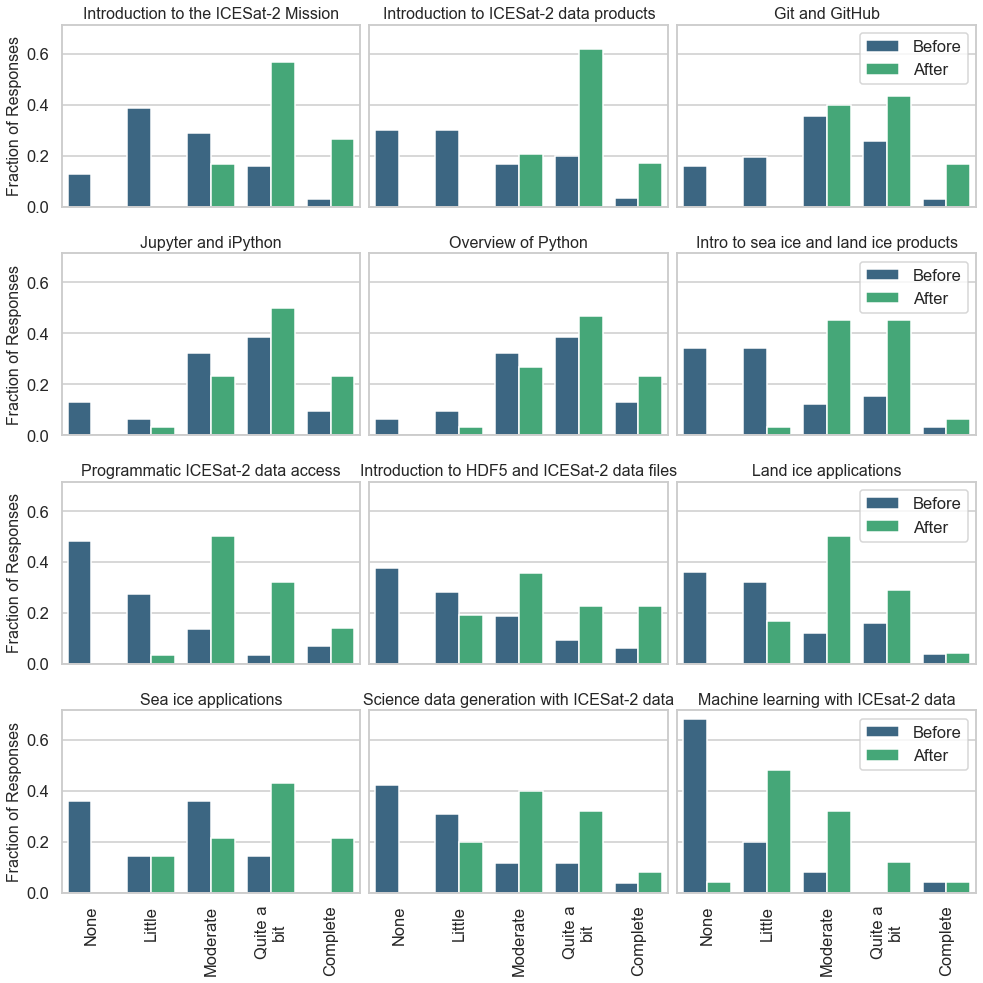

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(14, 14), sharex=True, sharey=True)

ax1 = question_barplot_2(q_ind1, title1, 
                       idx, df, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot_2(q_ind2, title2, 
                       idx, df, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot_2(q_ind3, title3, 
                       idx, df, ax=ax3, palette="viridis")
ax3.legend_.remove()
ax3.set_ylabel("")

ax3.legend(loc=1)

ax4 = question_barplot_2(q_ind4, title4, 
                       idx, df, ax=ax4, palette="viridis")
ax4.legend_.remove()

ax5 = question_barplot_2(q_ind5, title5, 
                       idx, df, ax=ax5, palette="viridis")
ax5.legend_.remove()
ax5.set_ylabel("")

ax6 = question_barplot_2(q_ind6, title6, 
                       idx, df, ax=ax6, palette="viridis")
ax6.legend_.remove()
ax6.set_ylabel("")
ax6.legend(loc=1)

ax7 = question_barplot_2(q_ind7, title7, 
                       idx, df, ax=ax7, palette="viridis")
ax7.legend_.remove()

ax8 = question_barplot_2(q_ind8, title8, 
                       idx, df, ax=ax8, palette="viridis")
ax8.legend_.remove()
ax8.set_ylabel("")

ax9 = question_barplot_2(q_ind9, title9, 
                       idx, df, ax=ax9, palette="viridis")
ax9.legend_.remove()
ax9.set_ylabel("")
ax9.legend(loc=1)

ax10 = question_barplot_2(q_ind10, title10, 
                       idx, df, ax=ax10, palette="viridis")
ax10.legend_.remove()

ax11 = question_barplot_2(q_ind11, title11, 
                       idx, df, ax=ax11, palette="viridis")
ax11.legend_.remove()
ax11.set_ylabel("")

ax12 = question_barplot_2(q_ind12, title12, 
                       idx, df, ax=ax12, palette="viridis")
ax12.legend_.remove()
ax12.set_ylabel("")
ax12.legend(loc=1)

plt.tight_layout(w_pad=0.5)
plt.savefig("fig/tutorials.pdf", format='pdf', dpi=1000)

In [12]:
# List of all possible questions, since not every answer might be used
idx = ['Strongly Agree', 'Agree', 'Somewhat Agree', 
        'Somewhat Disagree', 'Disagree', "Strongly Disagree", "I don't know"]

In [13]:
q_ind1 = ["Q15_1"]
title1 = "I believe that this hackweek was \n useful for my future career."
q_ind2 = ["Q15_2"]
title2 = "I believe that I learned \n skills at this hackweek that are \n applicable outside academia."
q_ind3 = ["Q15_3"]
title3 = "I feel like I learned things that \n improve my day to day research."

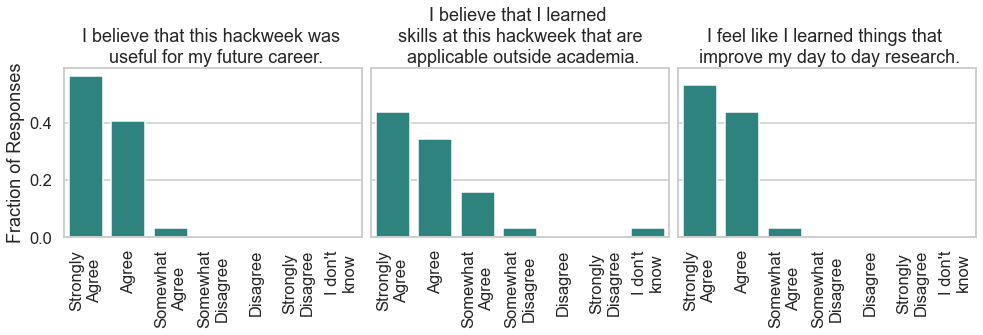

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx, df, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx, df, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx, df, ax=ax3, palette="viridis")

#ax3.legend(loc=1)
ax3.legend_.remove()
ax3.set_ylabel("")


plt.tight_layout(w_pad=0.5)
plt.savefig("fig/impacts.pdf", format='pdf', dpi=1000)

In [16]:
idx = ['Very Poor','Poor','Fair','Good','Very Good','Did not experience']
q_ind1 = ["Q16_1"]
title1 = questions["Q16_1"].split('?')[1].split(' - ')[1]
q_ind2 = ["Q16_2"]
title2 = questions["Q16_2"].split('?')[1].split(' - ')[1]
q_ind3 = ["Q16_3"]
title3 = questions["Q16_3"].split('?')[1].split(' - ')[1]
q_ind4 = ["Q16_4"]
title4 = questions["Q16_4"].split('?')[1].split(' - ')[1]
q_ind5 = ["Q16_5"]
title5 = questions["Q16_5"].split('?')[1].split(' - ')[1]

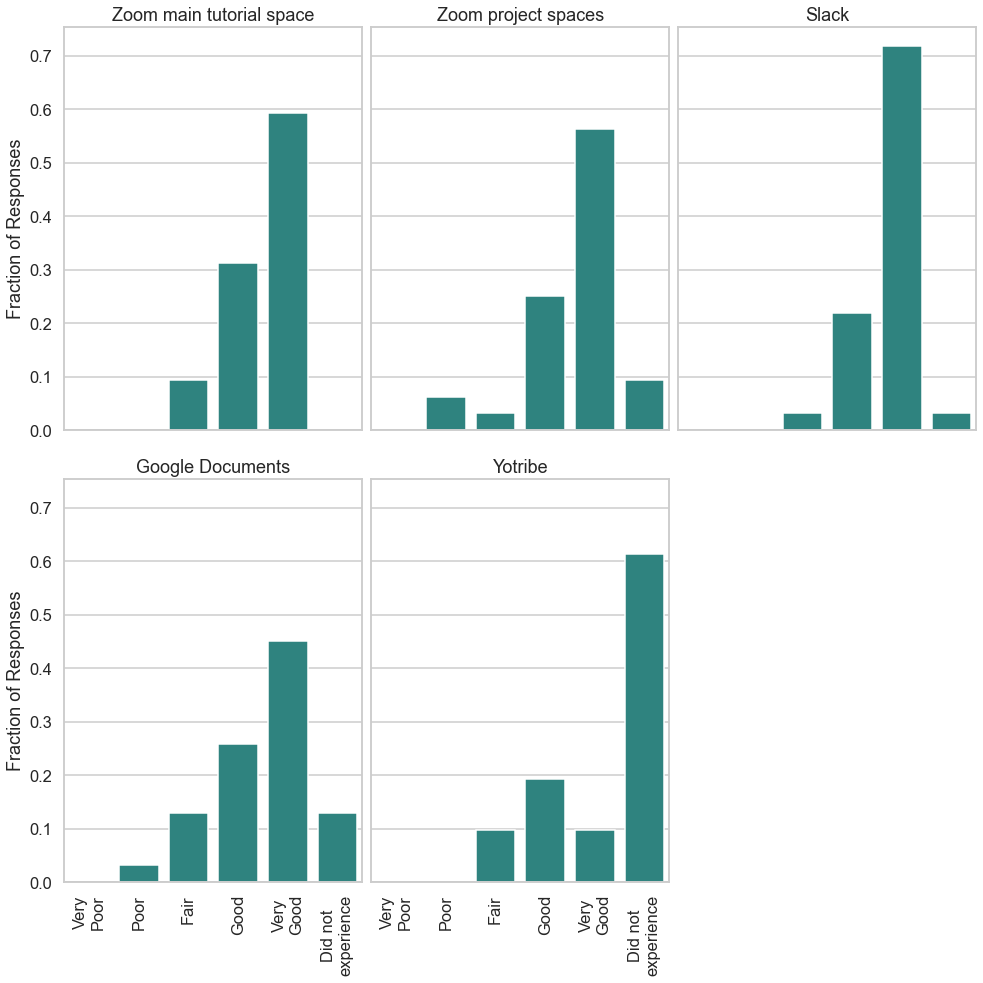

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(14, 14), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx, df, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2, 
                       idx, df, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3, 
                       idx, df, ax=ax3, palette="viridis")
ax3.legend_.remove()
ax3.set_ylabel("")

ax4 = question_barplot(q_ind4, title4, 
                       idx, df, ax=ax4, palette="viridis")
ax4.legend_.remove()

ax5 = question_barplot(q_ind5, title5, 
                       idx, df, ax=ax5, palette="viridis")
ax5.legend_.remove()
ax5.set_ylabel("")

fig.delaxes(ax6)


plt.tight_layout(w_pad=0.5)
plt.savefig("fig/virtual.pdf", format='pdf', dpi=1000)

### Participant preferences regarding type of event: virtual or in person?

In [25]:
print(questions["Q60"])
df["Q60"].value_counts()

If you were to attend a future ICESat-2 hackweek, which of these would you prefer?


a hybrid of a virtual and in-person event (e.g. virtual tutorials combined with in-person hacking at a large meeting)    18
an exclusively in-person event                                                                                           11
a virtual-only event                                                                                                      3
Name: Q60, dtype: int64

<AxesSubplot:title={'center':'How tiring was the workshop'}, ylabel='Frequency'>

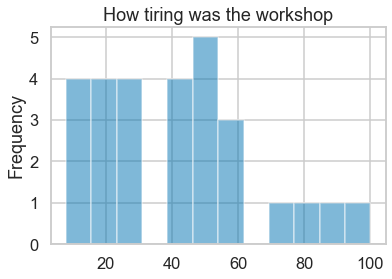

In [66]:
pd.to_numeric(df["Q23_0"]).to_frame().sort_values(by="Q23_0").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "How tiring was the workshop")

<AxesSubplot:title={'center':'Feeling like part of a community'}, ylabel='Frequency'>

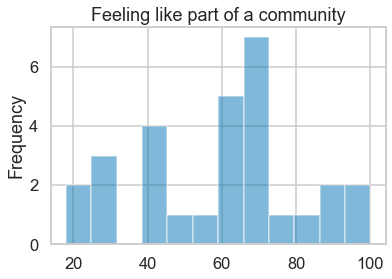

In [69]:
pd.to_numeric(df["Q24_0"]).to_frame().sort_values(by="Q24_0").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "Feeling like part of a community")

<AxesSubplot:title={'center':'More hacking / more lectures'}, ylabel='Frequency'>

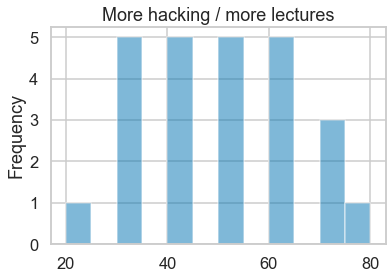

In [75]:
pd.to_numeric(df["Q17_1"]).to_frame().sort_values(by="Q17_1").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "More hacking / more lectures")

<AxesSubplot:title={'center':'Lecture style / interactive'}, ylabel='Frequency'>

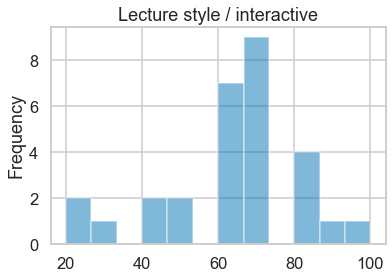

In [76]:
pd.to_numeric(df["Q18_1"]).to_frame().sort_values(by="Q18_1").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "Lecture style / interactive")

<AxesSubplot:title={'center':'not recommend / highly recommend to colleague'}, ylabel='Frequency'>

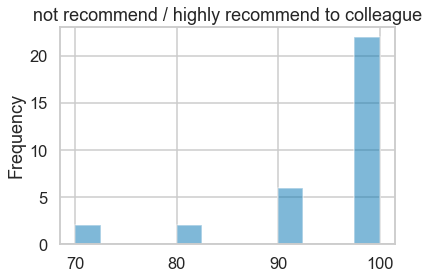

In [77]:
pd.to_numeric(df["Q19_1"]).to_frame().sort_values(by="Q19_1").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "not recommend / highly recommend to colleague")

In [81]:
df["Q19_1"].value_counts()

100    22
90      6
80      2
70      2
Name: Q19_1, dtype: int64

<AxesSubplot:title={'center':'not likely / highly likely to keep working with project'}, ylabel='Frequency'>

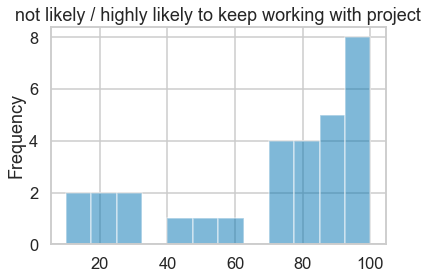

In [84]:
pd.to_numeric(df["Q59_1"]).to_frame().sort_values(by="Q59_1").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "not likely / highly likely to keep working with project")

In [87]:
df["Q59_1"].value_counts()

100    8
90     5
70     4
80     4
30     2
10     2
20     2
50     1
60     1
40     1
Name: Q59_1, dtype: int64

<AxesSubplot:title={'center':'more concentrated / spread out'}, ylabel='Frequency'>

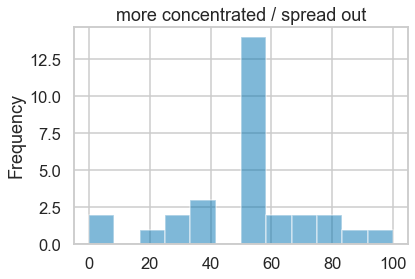

In [86]:
pd.to_numeric(df["Q26_0"]).to_frame().sort_values(by="Q26_0").plot.hist(bins=12, 
                                                                        alpha=0.5, 
                                                                        legend = False,
                                                                        title = "more concentrated / spread out")

In [88]:
idx = ['Very Frequently','Frequently','Occasionally','Rarely','Very Rarely','Never']
q_ind1 = ["Q20_1"]
title1 = questions["Q20_1"].split('?')[1].split(' - ')[1]
q_ind2 = ["Q20_2"]
title2 = questions["Q20_2"].split('?')[1].split(' - ')[1]
q_ind3 = ["Q20_3"]
title3 = questions["Q20_3"].split('?')[1].split(' - ')[1]
q_ind4 = ["Q20_4"]
title4 = questions["Q16_4"].split('?')[1].split(' - ')[1]

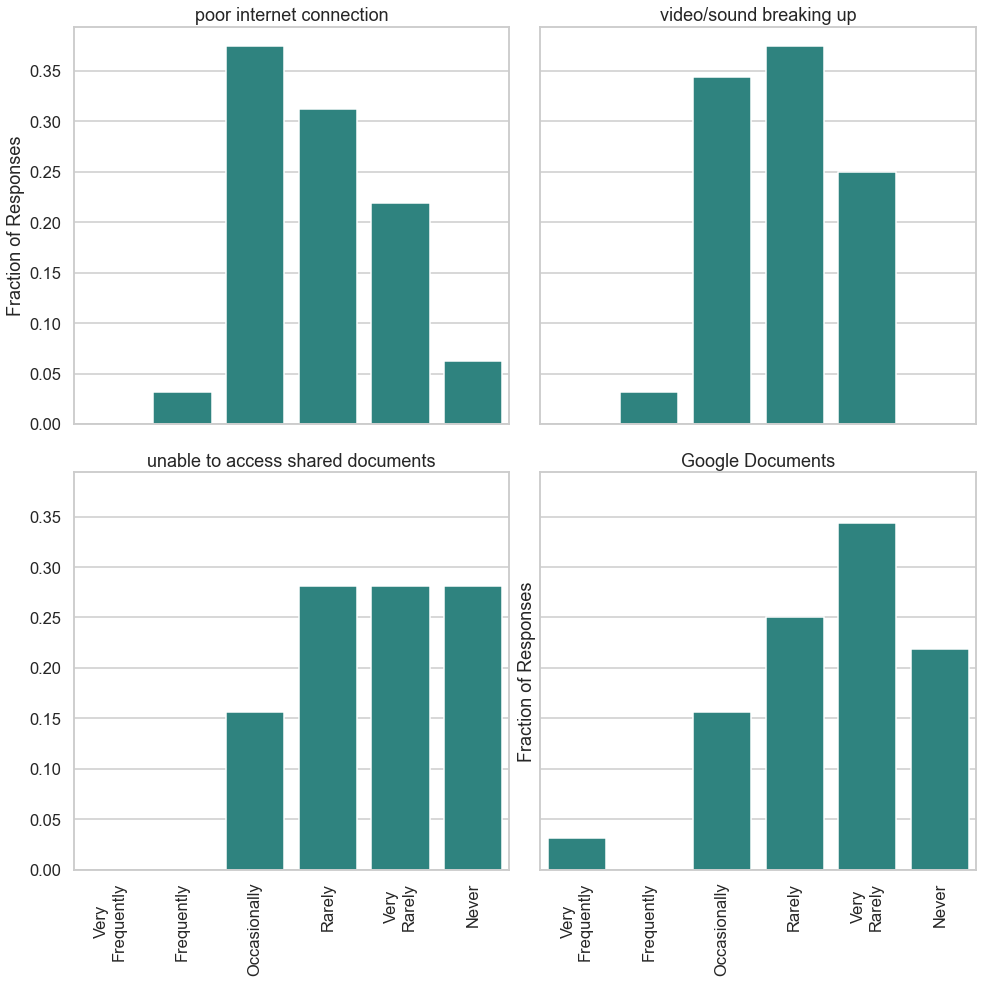

In [91]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14, 14), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx, df, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2, 
                       idx, df, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3, 
                       idx, df, ax=ax3, palette="viridis")
ax3.legend_.remove()

ax4 = question_barplot(q_ind4, title4, 
                       idx, df, ax=ax4, palette="viridis")
ax4.legend_.remove()
ax3.set_ylabel("")

plt.tight_layout(w_pad=0.5)
plt.savefig("fig/connectity.pdf", format='pdf', dpi=1000)